# Feature Scaling

###### what is feature scaling 
Fature scaling is a technique to standardize the features present in the data in a fixed range    
  input features(independent features) => (bring them in a small range)

#### Types of feature scaling
    -Standardization
    -Normalization

### Standardization aslo called (Z-score Normalization)
    example: we have an age table (transformation)

    Age (Xi)       
    27                   Xi - X(bar) => mean
    30           X`i =  ___________
    16                   σ => (std)
    65  

    (when we scale so that new column mean=0 and std=> σ=1 )
     

In [60]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# -----------------------------
# 2. Generate Dataset (100 rows)
# -----------------------------
np.random.seed(42)

# Features
age = np.random.randint(20, 61, 100)        # Age: 20-60

# Target: Purchased (0 or 1) with some randomness
salary = np.random.randint(20000, 200001, 100)  # bigger range
threshold = 50
purchased = ((age + salary/5000 + np.random.normal(0, 10, 100)) > 50).astype(int)



# Create DataFrame
df = pd.DataFrame({
    'Age': age,
    'Salary': salary,
    'Purchased': purchased
})

# Features & target
X = df[['Age', 'Salary']]
y = df['Purchased']

# -----------------------------
# 3. Train-Test Split (with stratify!)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Train class distribution:\n", y_train.value_counts())
print("Test class distribution:\n", y_test.value_counts())

# -----------------------------
# 4. Logistic Regression WITHOUT Scaling
# -----------------------------
clf_lr_raw = LogisticRegression()
clf_lr_raw.fit(X_train, y_train)
y_pred_lr_raw = clf_lr_raw.predict(X_test)
acc_lr_raw = accuracy_score(y_test, y_pred_lr_raw)

print("\nLogistic Regression Accuracy WITHOUT Scaling:", acc_lr_raw)

# -----------------------------
# 5. Apply StandardScaler
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 6. Logistic Regression WITH Scaling
# -----------------------------
clf_lr_scaled = LogisticRegression()
clf_lr_scaled.fit(X_train_scaled, y_train)
y_pred_lr_scaled = clf_lr_scaled.predict(X_test_scaled)
acc_lr_scaled = accuracy_score(y_test, y_pred_lr_scaled)

print("Logistic Regression Accuracy WITH Scaling   :", acc_lr_scaled)

# -----------------------------
# 7. KNN WITHOUT Scaling
# -----------------------------
clf_knn_raw = KNeighborsClassifier(n_neighbors=5)
clf_knn_raw.fit(X_train, y_train)
y_pred_knn_raw = clf_knn_raw.predict(X_test)
acc_knn_raw = accuracy_score(y_test, y_pred_knn_raw)

print("\nKNN Accuracy WITHOUT Scaling:", acc_knn_raw)

# -----------------------------
# 8. KNN WITH Scaling
# -----------------------------
clf_knn_scaled = KNeighborsClassifier(n_neighbors=5)
clf_knn_scaled.fit(X_train_scaled, y_train)
y_pred_knn_scaled = clf_knn_scaled.predict(X_test_scaled)
acc_knn_scaled = accuracy_score(y_test, y_pred_knn_scaled)

print("KNN Accuracy WITH Scaling   :", acc_knn_scaled)


Train class distribution:
 Purchased
1    59
0    16
Name: count, dtype: int64
Test class distribution:
 Purchased
1    19
0     6
Name: count, dtype: int64

Logistic Regression Accuracy WITHOUT Scaling: 0.92
Logistic Regression Accuracy WITH Scaling   : 0.92

KNN Accuracy WITHOUT Scaling: 0.72
KNN Accuracy WITH Scaling   : 0.84


# When to use standardization
  Standardization is important when using following algorithm    
     
     - K-Mean  
     - K-Nearest-Neighbours  
     - Principle Component Analysis (PCA)  
     - Artificial Neural Network  
     - Gradient Descent
---

# Normalization?

Normalization transforms your features so that their values fall into a specific range, usually 0 to 1 (sometimes -1 to 1).

It is different from standardization (StandardScaler):

Standardization: Scales features to mean = 0, standard deviation = 1

Normalization: Scales features to a fixed range, typically 0–1

### Types
- MinMaxscaling
- Mean normalization
- Max absoloute
- Robust scaling

### MinMaxscaling  
Formula for Min-Max Normalization

                     Xi - Xmin
          Xnorm =   ____________
                     Xmax - Xmin

In [67]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df
df.columns = ['Class label', 'Alcohal','Malic acid']

In [68]:
df

,Class label,Alcohal,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohal', ylabel='Density'>

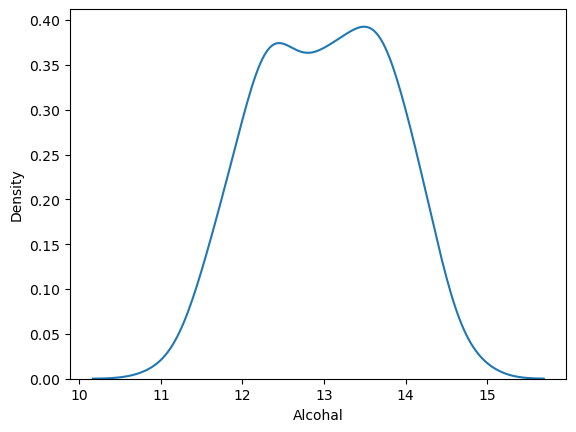

In [69]:
import seaborn as sns
sns.kdeplot(df['Alcohal'])

<Axes: xlabel='Malic acid', ylabel='Density'>

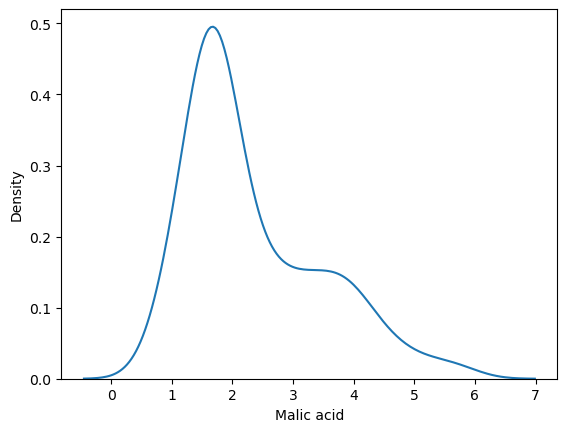

In [70]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohal', ylabel='Malic acid'>

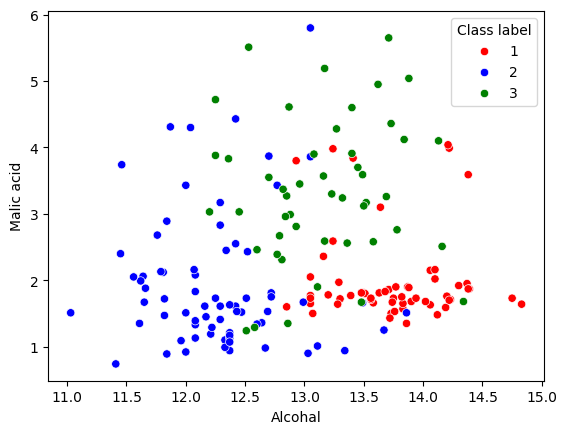

In [75]:
# scater plot
color_dict = {1:'red',3:'green',2:'blue'}
sns.scatterplot(data=df,x='Alcohal',y='Malic acid',hue=df['Class label'],palette=color_dict)

### So before scalling we need train test split

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(df.drop('Class label', axis=1),
                                                 df['Class label'],
                                                 test_size=0.3,
                                                 random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [80]:
#minMaxScalar
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

#fit the scalar to the train set, it will learn the perameters
scalar.fit(X_train)

#transform train and test sets
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [81]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [85]:
#old unscaled
np.round(X_train.describe(),1)
#new scalad
np.round(X_train_scaled.describe(),1) # normalization => to bring in fix range i.e 0 and 1

,Alcohal,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


---

# What is Mean Normalization?  

Mean normalization is another feature scaling technique, similar to Standardization and Min-Max Scaling.  

It scales your features so that they are centered around 0, typically in the range -1 to 1, by subtracting the mean and dividing by the range of the feature.

##### formula 


             X - X(mean)   
    Xnorm =   ___________    
             Xmax - Xmin   

### Key differences
| Method                    | Formula                  | Result                            |
| ------------------------- | ------------------------ | --------------------------------- |
| Standardization (Z-score) | ((X - mean)/std)         | Mean = 0, std = 1                 |
| Mean Normalization        | ((X - mean)/(max - min)) | Mean = 0, values mostly in [-1,1] |
| Min-Max Scaling           | ((X - min)/(max - min))  | Values in [0,1]                   |


## MaxAbsScalling

 ## Formula   
            x   
       `xi = _____   
           |x(abs)|  

## Robust Scaling
    it is robust to outliers

#### Formula
            xi - x(median)
      xi     _______________
             IQR {75 per - 25 per}

####  Normalization vs Standardization